<h1><center>Sistemas Inteligentes para a Bioinformática</center></h1>

<h1><center>“Data Science 4 Covid19”</center></h1>

#### Alunos: 
José Duarte PG40958  
Paulo Carvalhais PG40971  
Vasco Silva PG40976  
Cláudio Monteiro PG40109

Covid-19 epidemic had a high impact on social media usage worldwide with comments and information being spread from multiple sources. Some sources may be credible entities and experts, while others may be merely opinions and emotions originated by the users. In this scenario, text mining analysis, may prove an important tool in order to identify what drives the public conversation and the impact of Covid-19 in our lives and to identify changing emotions and sentiments during this difficult time. For this work we use the following dataset: https://www.kaggle.com/gpreda/covid19-tweets  
Objectives:
- Visualize the data and perform an exploratory analysis
- Analyze Covid-19 related tweets using text mining tools to perform a sentiment analysis
- Train a machine learning model to detect fake news.

## Exploratory analysis

### Packages import:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### Auxiliary functions  
  
Function "return_missing_values" returns the missing values from a dataset   
Function "plot_missing_values" is a method to plot the missing values  
Function "return_unique_values" returns the frequency of unique values  
Function "punctuation_stopwords_removal" removes stopwords  
Function "draw_bar_graph_for_text_visualization" is a method for wordcloud

In [2]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()
    
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

def punctuation_stopwords_removal(sms):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms


def draw_bar_graph_for_text_visualization(df,number_words,title):
    df_1 = df.copy(deep = True)
    df_1.loc[:, 'content'] = df_1['content'].apply(punctuation_stopwords_removal)
    df_1_curated = df_1['content'].tolist()
    loc_tweet_list = []
    for sublist in df_1_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(number_words), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title(title)
    plt.xticks(rotation='vertical');
    return loc_top_30_words

### Data import - 05.01.2020
Data import for date 05-01-2020. Diferentiation between Fake News and Real News.  
Fake News = 0  
Real News = 1

In [3]:
path = 'C:\\Users\\joseduarte\\jupyter_files\\trabalho_SIB\\05-01-2020\\'

News_Fake_05 = pd.read_csv(path+'NewsFakeCOVID-19.csv',index_col=0)
News_Fake_05['State'] = 0
News_Fake_05_Title_n_content = pd.concat([News_Fake_05['content'],News_Fake_05['title']],axis=1)
News_Fake_05_Title_n_content=News_Fake_05_Title_n_content.dropna(subset = ['content'])
News_Fake_05_Title_n_content['State'] = 0
News_Fake_05_Title_n_content.to_csv(path+'treated_fakes.csv')
News_Fake_05_Title_n_content.head()

,content,title,State
1,speaker robin vos r rochester and senate major...,Wisconsin is Òclearly seeing a decline in COVI...,0
16,this is not the page you 're looking for ..,Says WisconsinÕs in-person election has caused...,0
17,contrary to the narrative that is being pushed...,Nobel laureate Luc Montagnier claimed that the...,0
26,programming alert exclusive documentary on ori...,A video argues that the pandemic could have re...,0
32,buffalo n.y. wivb)--mayor byron brown was hand...,Gov. Andrew Cuomo Òwas simply saying if we can...,0


In [4]:
News_Real_05 = pd.read_csv(path+'NewsRealCOVID-19.csv',index_col=0)
News_Real_05['State'] = 1
News_Real_05_Title_n_content = pd.concat([News_Real_05['content'],News_Real_05['title']],axis=1)
News_Real_05_Title_n_content=News_Real_05_Title_n_content.dropna(subset = ['content'])
News_Real_05_Title_n_content['State'] = 1
News_Real_05_Title_n_content.to_csv(path+'treated_reals.csv')
News_Real_05_Title_n_content.head()

,content,title,State
0,experts warn most states that are reopening st...,Coronavirus Outbreak: Live Updates,1
1,a new study finds an increase in screen time d...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...",1
2,scientists around the world are working on a n...,Here’s Exactly Where We Are with Vaccines and ...,1
3,coronaviruses cause respiratory illnesses so t...,Here’s What Happens to the Body After Contract...,1
4,medical experts are studying if remdesivir can...,Why You Should Be Skeptical of Early Results o...,1


### Data import - 07.01.2020
Data import for date 07-01-2020. Diferentiation between Fake News and Real News.  
Fake News = 0  
Real News = 1

In [5]:
path = 'C:\\Users\\joseduarte\\jupyter_files\\trabalho_SIB\\07-01-2020\\'

News_Fake_07 = pd.read_csv(path+'NewsFakeCOVID-19.csv',index_col=0)
News_Fake_07['State'] = 0
News_Fake_07_Title_n_content = pd.concat([News_Fake_07['content'],News_Fake_07['title']],axis=1)
News_Fake_07_Title_n_content=News_Fake_07_Title_n_content.dropna(subset = ['content'])
News_Fake_07_Title_n_content['State'] = 0
News_Fake_07_Title_n_content.to_csv(path+'treated_fakes.csv')
News_Fake_07_Title_n_content.head()

,content,title,State
623,snag limbrats that daddy 22s out of the toweri...,A “face mask exempt card” shared on social med...,0
624,see more of jeff neff on facebook.,A test on video with a gas detector shows that...,0
625,we 've detected that javascript is disabled in...,A painting depicting children in face masks wa...,0
627,see more of jeff cloud on facebook.,Meme shows Florida Surgeon General saying: Eve...,0
628,see more of theresa ivancik on facebook.,Alexandria Ocasio-Cortez tweeted “It’s vital t...,0


In [6]:
News_Real_07 = pd.read_csv(path+'NewsRealCOVID-19.csv',index_col=0)
News_Real_07['State'] = 1
News_Real_07_Title_n_content = pd.concat([News_Real_07['content'],News_Real_07['title']],axis=1)
News_Real_07_Title_n_content=News_Real_07_Title_n_content.dropna(subset = ['content'])
News_Real_07_Title_n_content['State'] = 1
News_Real_07_Title_n_content.to_csv(path+'treated_reals.csv')
News_Real_07_Title_n_content.head()

,content,title,State
1555,experts recommend everyone avoid large gatheri...,How to Enjoy the Fourth of July Weekend Amid t...,1
1556,experts say the key is to stay in the know and...,CDC Expands List of Those with Higher COVID-19...,1
1557,some people have reportedly been presenting fa...,Feds Warn That Face Mask ‘Exemption’ Cards Are...,1
1558,medical experts say they believe bidens plan t...,Experts Confident Biden’s COVID-19 Response Co...,1
1559,scientists around the world are working on a n...,Here’s Exactly Where We Are with Vaccines and ...,1


### Data import - 09.01.2020
Data import for date 09-01-2020. Diferentiation between Fake News and Real News.  
Fake News = 0  
Real News = 1

In [7]:
path = 'C:\\Users\\joseduarte\\jupyter_files\\trabalho_SIB\\09-01-2020\\'

News_Fake_09 = pd.read_csv(path+'NewsFakeCOVID-19.csv',index_col=0)
News_Fake_09['State'] = 0
News_Fake_09_Title_n_content = pd.concat([News_Fake_09['content'],News_Fake_09['title']],axis=1)
News_Fake_09_Title_n_content=News_Fake_09_Title_n_content.dropna(subset = ['content'])
News_Fake_09_Title_n_content['State'] = 0
News_Fake_09_Title_n_content.to_csv(path+'treated_fakes.csv')
News_Fake_09_Title_n_content.head()

,content,title,State
889,you must log in to continue ..,The U.S. CDC quietly updated their numbers in ...,0
890,we 've detected that javascript is disabled in...,Social media posts shared thousands of times a...,0
892,do you want to join facebook ?.,Either masks work or they don’t; if masks work...,0
893,this was important enough that i wanted to get...,The RT-PCR test for the virus that causes COVI...,0
894,governor of maine has ordered restaurant staff...,The Governor of Maine has ordered restaurant s...,0


In [8]:
News_Real_09 = pd.read_csv(path+'NewsRealCOVID-19.csv',index_col=0)
News_Real_09['State'] = 1
News_Real_09_Title_n_content = pd.concat([News_Real_09['content'],News_Real_09['title']],axis=1)
News_Real_09_Title_n_content=News_Real_09_Title_n_content.dropna(subset = ['content'])
News_Real_09_Title_n_content['State'] = 1
News_Real_09_Title_n_content.to_csv(path+'treated_reals.csv')
News_Real_09_Title_n_content.head()

,content,title,State
2658,experts say crowded beaches like this one in b...,What We Can Learn from the Resurgence of COVID...,1
2659,increasing number of healthcare experts say th...,Why Approving a COVID-19 Vaccine Too Early Cou...,1
2660,fatigue and body aches are symptoms of both fl...,Not Sure You Have COVID-19? Here Are the Sympt...,1
2661,researchers say women are more likely than men...,Flu Study Highlights Difficulty of Achieving C...,1
2662,some teachers have quit while others have sued...,Resign or Return? The Dilemma Facing Classroom...,1


## Dataset analysis

### Missing Values

Data:

In [9]:
News_Real_05.head()

,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,State
0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i...",1
1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ...",1
2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre...",1
3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,...",1
4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi...",1


Missing values of the real news dataset 05.01.2020

In [10]:
return_missing_values(News_Real_05)

type                1
news_url            1
newstitle          22
meta_keywords      22
content           193
abstract          258
publish_date     1284
dtype: int64

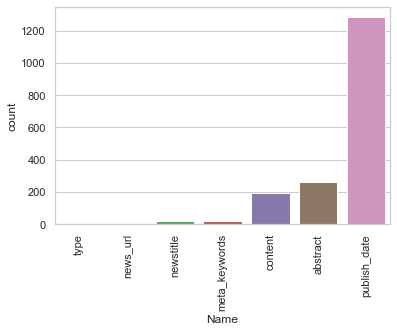

In [11]:
plot_missing_values(News_Real_05)

Missing values of the real news dataset 07.01.2020

In [12]:
return_missing_values(News_Real_07)

type               2
news_url           2
newstitle          2
meta_keywords      2
content          140
abstract         505
publish_date     812
dtype: int64

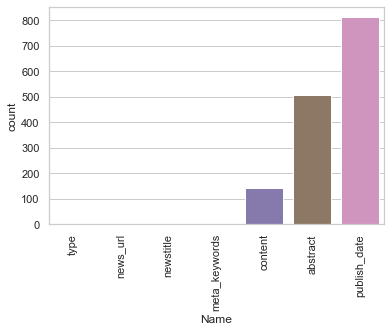

In [13]:
plot_missing_values(News_Real_07)

Missing values of the real news dataset 09.01.2020

In [14]:
return_missing_values(News_Real_09)

content          93
abstract        380
publish_date    646
dtype: int64

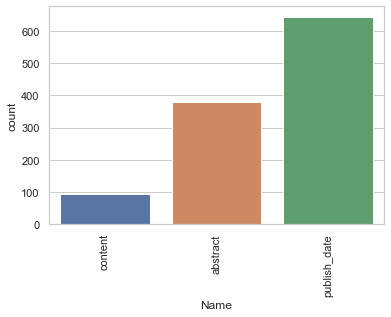

In [15]:
plot_missing_values(News_Real_09)

Missing values of the fake news dataset 05.01.2020

In [16]:
return_missing_values(News_Fake_05)

type              23
news_url          23
archieve         369
newstitle        439
meta_keywords    439
content          447
publish_date     479
abstract         505
news_url2        530
news_url3        547
news_url4        557
news_url5        568
dtype: int64

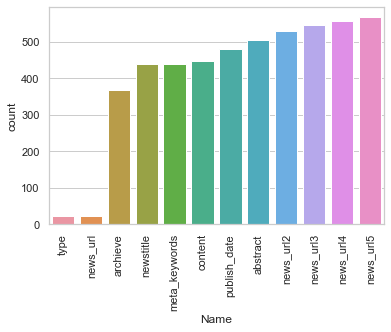

In [17]:
plot_missing_values(News_Fake_05)

Missing values of the fake news dataset 07.01.2020

In [18]:
return_missing_values(News_Fake_07)

type              14
news_url          14
newstitle         16
meta_keywords     16
content           41
abstract         105
archieve         157
publish_date     231
news_url2        236
news_url3        245
news_url4        255
news_url5        260
dtype: int64

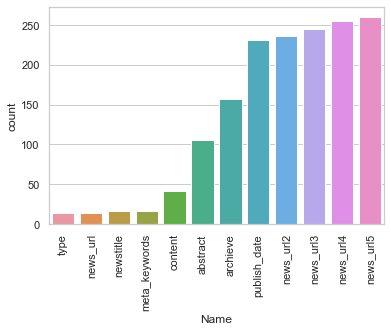

In [19]:
plot_missing_values(News_Fake_07)

Missing values of the fake news dataset 09.01.2020

In [20]:
return_missing_values(News_Fake_09)

type              3
news_url          3
newstitle         3
meta_keywords     3
content           9
archieve         17
abstract         29
news_url2        39
news_url3        45
publish_date     46
news_url4        49
news_url5        51
dtype: int64

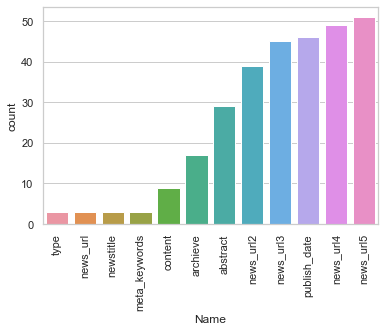

In [21]:
plot_missing_values(News_Fake_09)

### Unique values

### Full Fake

In [22]:
Full_Fake =pd.concat([News_Fake_05,News_Fake_07,News_Fake_09])
Full_Fake = Full_Fake.dropna(subset = ['content'])
return_unique_values(Full_Fake)

,Features,Uniques
0,type,2
1,fact_check_url,394
2,archieve,192
3,news_url,378
4,news_url2,45
5,news_url3,32
6,news_url4,20
7,news_url5,13
8,title,395
9,newstitle,313


### Full Real

In [23]:
Full_Real = pd.concat([News_Real_05,News_Real_07,News_Real_09])
Full_Real = Full_Real.dropna(subset = ['content'])
return_unique_values(Full_Real)

,Features,Uniques
0,type,2
1,fact_check_url,49
2,news_url,2976
3,title,3019
4,newstitle,1781
5,content,2364
6,abstract,2188
7,publish_date,128
8,meta_keywords,1850
9,State,1


### Full News

In [24]:
Full_News = pd.concat([News_Fake_05,News_Fake_07,News_Fake_09,News_Real_05,News_Real_07,News_Real_09])
Full_News = Full_News.dropna(subset = ['content'])
return_unique_values(Full_News)

,Features,Uniques
0,type,2
1,fact_check_url,442
2,archieve,192
3,news_url,3352
4,news_url2,45
5,news_url3,32
6,news_url4,20
7,news_url5,13
8,title,3414
9,newstitle,2089


In [25]:
Full_News = Full_News.drop_duplicates(subset='content')
unique_df = return_unique_values(Full_News)

### Plot that shows the unique values of each column 

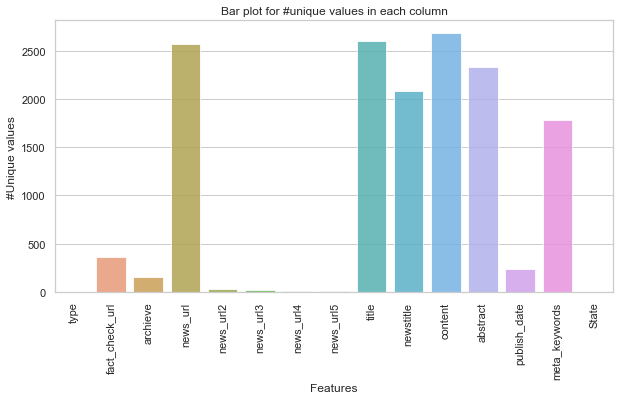

In [26]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
plt.title('Bar plot for #unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Top 50 words on Real News

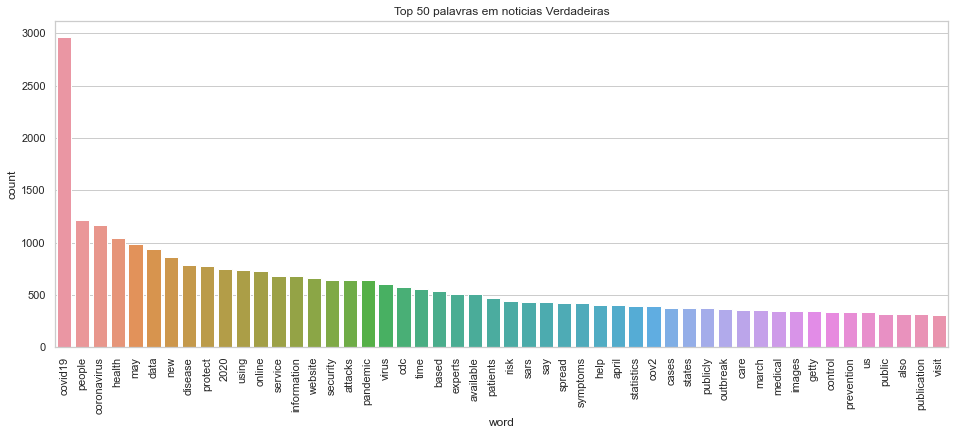

In [27]:
FR = draw_bar_graph_for_text_visualization(Full_Real,50,'Top 50 palavras em noticias Verdadeiras')

### Top 50 words on Fake News

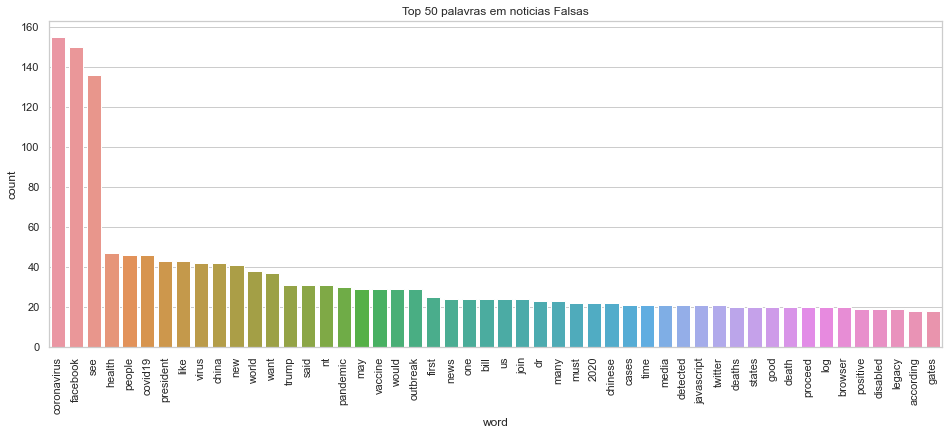

In [28]:
FF = draw_bar_graph_for_text_visualization(Full_Fake,50,'Top 50 palavras em noticias Falsas')

### Top 100 words on all news

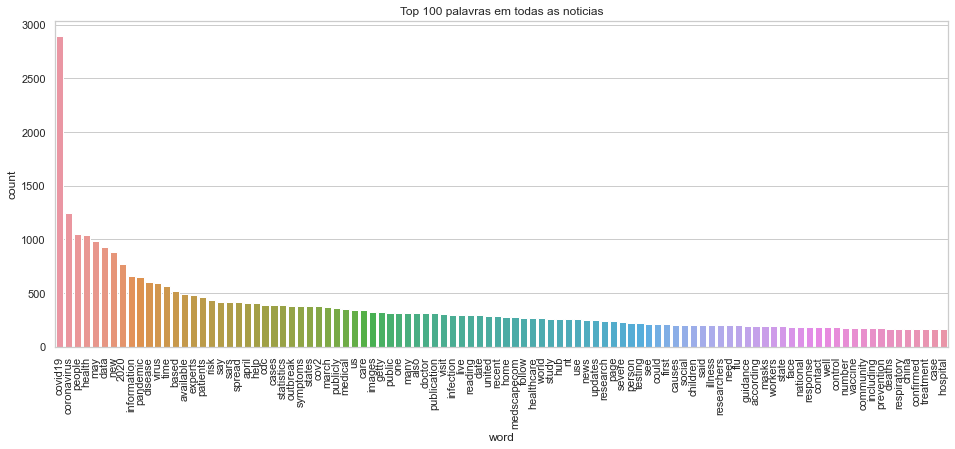

In [29]:
FN = draw_bar_graph_for_text_visualization(Full_News,100,'Top 100 palavras em todas as noticias')

### Wordcloud of the top 50 words on real news

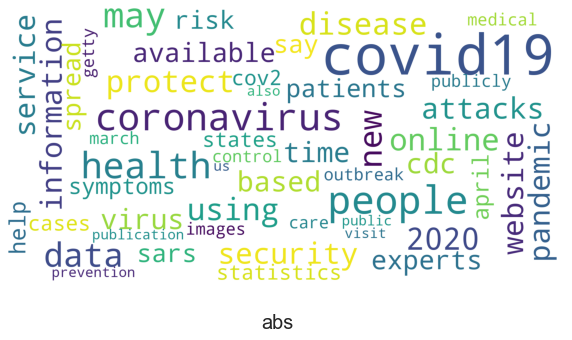

In [32]:
dic_50_words_FR = {}
for i in range (len(FR)):
    dic_50_words_FR[FR.iloc[i]['word']] = FR.iloc[i]['count']

wordcloud_FR = WordCloud(background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate_from_frequencies(dic_50_words_FR)
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('abs', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_FR)
plt.show()

### Wordcloud of the top 50 words on fake news

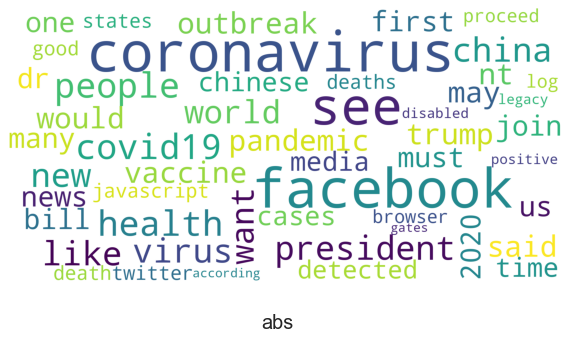

In [33]:
dic_50_words_FF = {}
for i in range (len(FF)):
    dic_50_words_FF[FF.iloc[i]['word']] = FF.iloc[i]['count']

wordcloud_FF = WordCloud(background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate_from_frequencies(dic_50_words_FF)
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('abs', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_FF)
plt.show()

### Wordcloud top 50 unique words on all news
#### These words don't appear simultaneously on fake and real news

In [34]:
dic_50_words_FN = {}
for i in range (len(FN)):
    dic_50_words_FN[FN.iloc[i]['word']] = FN.iloc[i]['count']

rm_words = []
for key in dic_50_words_FF.keys():
    for key_2 in  dic_50_words_FR.keys():
        if key == key_2 and key in dic_50_words_FN:
            rm_words.append(key)
            del dic_50_words_FN[key]

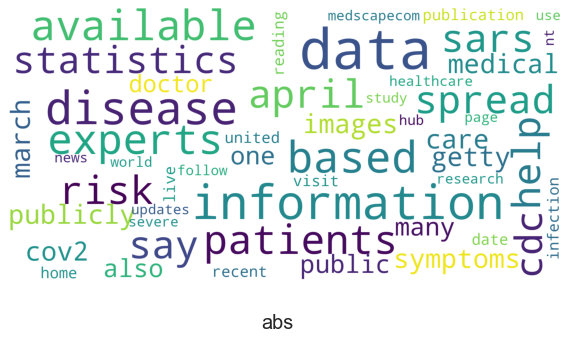

In [35]:
wordcloud_FN = WordCloud(background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate_from_frequencies(dic_50_words_FN)
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('abs', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud_FN)
plt.show()

### Removed words, that appeared simultaneously on fake and real news

In [36]:
rm_words

['coronavirus',
 'health',
 'people',
 'covid19',
 'virus',
 'new',
 'pandemic',
 'may',
 'outbreak',
 'us',
 '2020',
 'cases',
 'time',
 'states']